In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult 3.csv to adult 3.csv


In [4]:
import pandas as pd
data=pd.read_csv("adult 3.csv")


In [5]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [6]:
data.tail(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [7]:
data.shape

(48842, 15)

In [8]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [9]:
print(data.workclass.value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


In [10]:
data.workclass.replace({'?':'Others'},inplace=True)
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


/tmp/ipython-input-4184710730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.workclass.replace({'?':'Others'},inplace=True)


In [11]:
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


In [12]:
data.occupation.replace({'?':'Others'},inplace=True)
print(data['occupation'].value_counts())

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Others               2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


/tmp/ipython-input-1148816719.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.occupation.replace({'?':'Others'},inplace=True)


In [13]:
data=data[data['workclass']!='Without-pay']
data=data[data['workclass']!='Never-worked']
print(data['workclass'].value_counts())

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
Others               2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Name: count, dtype: int64


In [ ]:
print(data.relationship.value_counts())

relationship
Husband           19708
Not-in-family     12582
Own-child          7566
Unmarried          5123
Wife               2327
Other-relative     1505
Name: count, dtype: int64


In [14]:
print(data.gender.value_counts())

gender
Male      32629
Female    16182
Name: count, dtype: int64


In [ ]:
data.shape

(48811, 15)

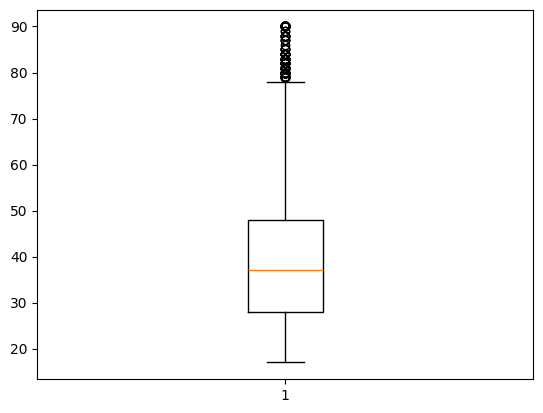

In [15]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['age'])
plt.show()

In [18]:
data=data[(data['age']<=75)&(data['age']>=17)]

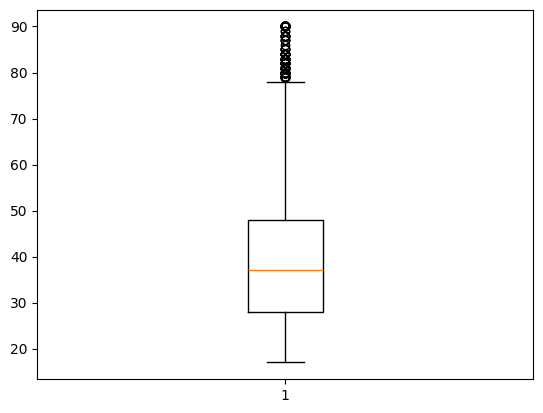

In [16]:
plt.boxplot(data['age'])
plt.show()

In [19]:
data.shape

(48438, 15)

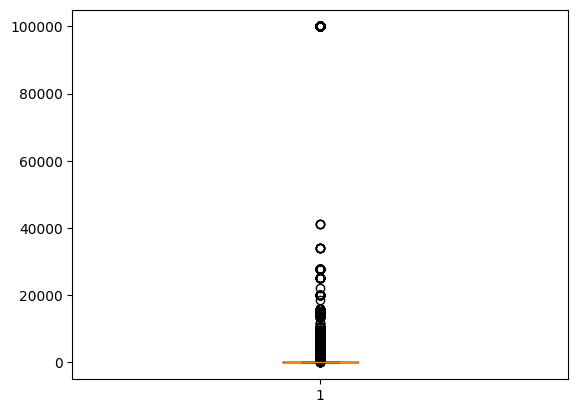

In [20]:
plt.boxplot(data['capital-gain'])
plt.show()

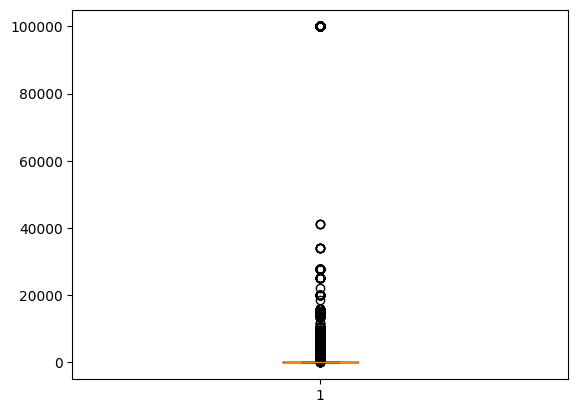

In [21]:
plt.boxplot(data['capital-gain'])
plt.show()

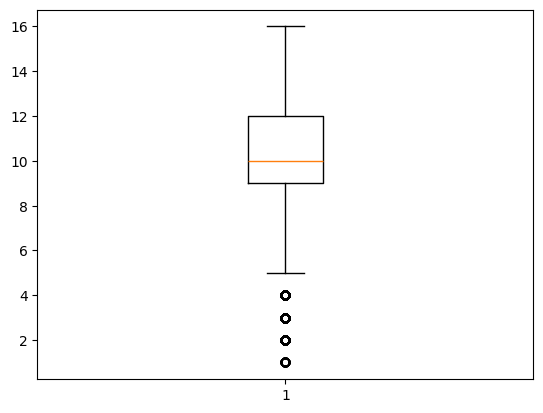

In [22]:
plt.boxplot(data['educational-num'])
plt.show()

In [23]:
data=data[(data['educational-num']<=16)&(data['educational-num']>=5)]

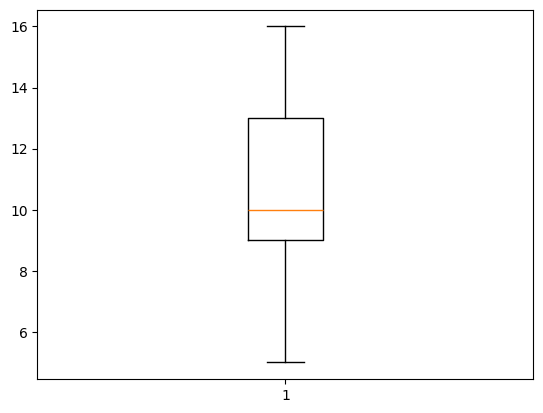

In [24]:
plt.boxplot(data['educational-num'])
plt.show()

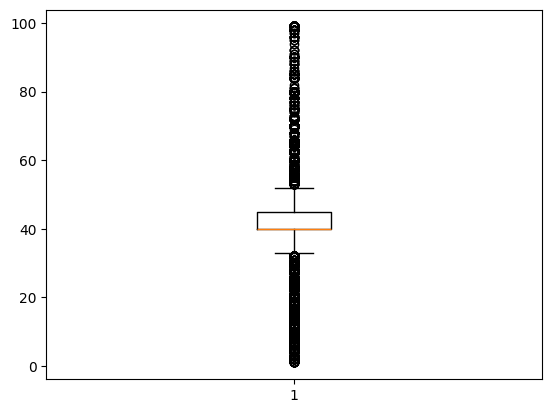

In [25]:
plt.boxplot(data['hours-per-week'])
plt.show()

In [26]:
data.shape

(46720, 15)

In [27]:
data=data.drop(columns=['education']) #redundant features removal

In [ ]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Others,103497,10,Never-married,Others,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [28]:
from sklearn.preprocessing import LabelEncoder   #import libarary
encoder=LabelEncoder()                       #create object
data['workclass']=encoder.fit_transform(data['workclass']) #7 categories   0,1, 2, 3, 4, 5, 6,
data['marital-status']=encoder.fit_transform(data['marital-status'])   #3 categories 0, 1, 2
data['occupation']=encoder.fit_transform(data['occupation'])
data['relationship']=encoder.fit_transform(data['relationship'])      #5 categories  0, 1, 2, 3, 4
data['race']=encoder.fit_transform(data['race'])
data['gender']=encoder.fit_transform(data['gender'])    #2 catogories     0, 1
data['native-country']=encoder.fit_transform(data['native-country'])

In [29]:
data

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,7,4,6,3,2,1,0,0,40,39,<=50K
1,38,3,89814,9,2,4,0,4,1,0,0,50,39,<=50K
2,28,1,336951,12,2,11,0,4,1,0,0,40,39,>50K
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39,>50K
4,18,2,103497,10,4,8,3,4,0,0,0,30,39,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39,<=50K
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39,>50K
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39,<=50K
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39,<=50K


In [30]:
x=data.drop(columns=['income'])
y=data['income']
x

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,3,226802,7,4,6,3,2,1,0,0,40,39
1,38,3,89814,9,2,4,0,4,1,0,0,50,39
2,28,1,336951,12,2,11,0,4,1,0,0,40,39
3,44,3,160323,10,2,6,0,2,1,7688,0,40,39
4,18,2,103497,10,4,8,3,4,0,0,0,30,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,257302,12,2,13,5,4,0,0,0,38,39
48838,40,3,154374,9,2,6,0,4,1,0,0,40,39
48839,58,3,151910,9,6,0,4,4,0,0,0,40,39
48840,22,3,201490,9,4,0,3,4,1,0,0,20,39


In [31]:
results = {
    "Logistic Regression": 0.84,
    "Decision Tree": 0.81,
    "Random Forest": 0.87,
    "KNN": 0.78
}


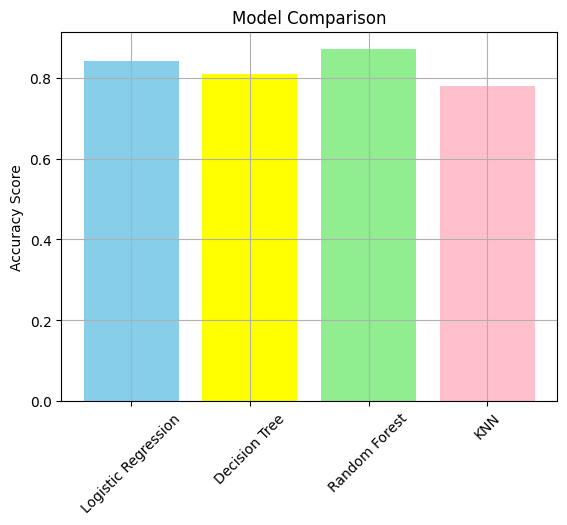

In [32]:
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color=['skyblue','yellow','lightgreen' ,'pink'])
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [33]:
import pandas as pd
from sklearn.datasets import load_iris

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib

# Load dataset (Iris)
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "RandomForest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "GradientBoosting": GradientBoostingClassifier()
}

results = {}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    results[name] = acc
    print(f"{name}: {acc:.4f}")

# Get best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n✅ Best model: {best_model_name} with accuracy {results[best_model_name]:.4f}")

# Save the best model
joblib.dump(best_model, "best_model.pkl")
print("✅ Saved best model as best_model.pkl")


LogisticRegression: 1.0000
RandomForest: 1.0000
KNN: 1.0000
SVM: 1.0000
GradientBoosting: 1.0000

✅ Best model: LogisticRegression with accuracy 1.0000
✅ Saved best model as best_model.pkl


In [34]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.4 MB/s eta 0:00:00


In [35]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("best_model.pkl")

st.set_page_config(page_title="Employee Salary Prediction", page_icon="💼", layout="centered" )

st.title("🪪 Employee Salary Prediction App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on input features.")

# Sidebar inputs (these must match your training feature columns)
st.sidebar.header("Input Employee Details")

# ✨ Replace these fields with your dataset's actual input columns
age = st.sidebar.slider("Age", 18, 65, 30)
gender = st.sidebar.selectbox("Gender", ["Male", "Female"])
education = st.sidebar.selectbox("Education Level", [
    "Bachelors", "Masters", "PhD", "HS-grad", "Assoc", "Some-college"
])
occupation = st.sidebar.selectbox("Job Role", [
    "Tech-support", "Craft-repair", "Other-service", "Sales",
    "Exec-managerial", "Prof-specialty", "Handlers-cleaners", "Machine-op-inspct",
    "Adm-clerical", "Farming-fishing", "Transport-moving", "Priv-house-serv",
    "Protective-serv", "Armed-Forces"
])
hours_per_week = st.sidebar.slider("Hours per week", 1, 80, 40)
experience = st.sidebar.slider("Years of Experience", 0, 40, 5)

# Build input DataFrame (⚠️ must match preprocessing of your training data)
input_df = pd.DataFrame({
    'age': [age],
    'gender':[gender],
    'education': [education],
    'occupation': [occupation],
    'hours-per-week': [hours_per_week],
    'experience': [experience]
})

st.write("### 🔎 Input Data")
st.write(input_df)

# Predict button
if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    st.success(f"✅ Prediction: {prediction[0]}")

# Batch prediction
st.markdown("---")
st.markdown("#### 📂 Batch Prediction")
uploaded_file = st.file_uploader("Upload a CSV file for batch prediction", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Uploaded data preview:", batch_data.head())
    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = batch_preds
    st.write("✅ Predictions:")
    st.write(batch_data.head())
    csv = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Predictions CSV", csv, file_name='predicted_classes.csv', mime='text/csv')

Writing app.py


In [39]:
!ngrok config 36YM8rhZiAWaHzEzEQ1FTK13LP0_5WdYwDp4RLbK7ttssRcRh


NAME:
  config - update or migrate ngrok's configuration file

USAGE:
  ngrok config [flags]

DESCRIPTION: 
  The config command gives a quick way to create or update ngrok's configuration
  file. Use 'add-authtoken' or 'add-api-key' to set the corresponding properties.

  Use 'check' to test a configuration file for validity. If you have an old
  configuration file, you can also use 'upgrade' to automatically migrate to the
  latest version.

COMMANDS:
  add-api-key                    save api key to configuration file
  add-authtoken                  save authtoken to configuration file
  add-connect-url                adds the connect URL (connect_url) to configuration file for custom agent ingress
  add-server-addr                alias of add-connect-url
  check                          check configuration file
  edit                           edit configuration file
  upgrade                        auto-upgrade configuration file

OPTIONS:
      --config strings   path to config f

In [ ]:
!streamlit run app.py &
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("✅ Streamlit URL:", public_url)





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.11.110.240:8501

